In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

Dans le notebook suivant, nous allons illustrer de façon empirique le [théorème central limite](https://fr.wikipedia.org/wiki/Th%C3%A9or%C3%A8me_central_limite). Ce théorème jour un rôle fondamental en statistique, et nous y ferons appel pour justifier la forme des termes d'erreurs lors de la régression. Il permet de contrôler le comportement d'une somme de variables aléatoires indépendantes et identiquement distribuées lorsque le nombre de tirage est suffisant.

Quelque soit la distribution initiale à partir de laquelle on échantillonne, la moyenne de l'échantillon sera distribuée suivant une loi normale, avec un écart type qui se réduit en $1/\sqrt N $.

Si on définit la variable centrée et réduite:
\begin{equation} z = \frac{x - \mu}{\sigma}\end{equation} 
Alors, pour N suffisamment grand 
$z \rightarrow N(0,1)$

Nous allons générer une liste de nombre dont nous connaissons parfaitement les propriétés telles que la moyenne ou l'écart-type. 

In [3]:
x = np.random.uniform(100,200, size=10000)
print('shape x : ', x.shape)
print('10 first elements of x : \n', x[:10])

shape x :  (10000,)
10 first elements of x : 
 [ 146.25834729  147.34776607  119.69690013  145.11490764  158.73654324
  111.78619916  102.7185503   123.77210284  126.05438753  112.12152532]


In [60]:
print("true mean is", x.mean())

true mean is 149.97287719078236


Si on prend 1, puis 2, puis k éléments, alors la moyenne calculée se baladera autour de 49.5, en suivant une loi normale caractérisée par l'écart-type $1/\sqrt k$ 

Nous allons échantillonner plusieurs fois une liste de taille k < 100, et allons voir comment se comportent la moyenne. Compléter la fonction ci-dessous qui prend en entrée un vecteur et qui retourne un vecteur de taille inférieure ou égale.

In [4]:
def sample_index(x, size):
    """sample random elements and return array index with length defined by size
    
        Args:
            x (numpy.array) : vector to sample from
        Returns:
            numpy.array with length defined by size
    """
    if size > len(x): size = len(x)
    index = np.arange(x.size)
    np.random.shuffle(index)
    return index[:size]

In [59]:
test = np.arange(10000)
print(test)
np.random.shuffle(test)
k=10
print(test[:k])

[   0    1    2 ..., 9997 9998 9999]
[4049 9869 5120 7544 3174 6119 6355  177 1575 4212]


In [134]:
x

array([ 146.25834729,  147.34776607,  119.69690013, ...,  142.62703267,
        154.69321629,  125.42233568])

In [133]:
x[[59,458,265]]

array([ 199.18284568,  191.82075204,  197.06407759])

In [148]:
x[sample_index(x, 10)]

array([ 117.94002416,  174.58681094,  117.37952311,  163.21961225,
        133.72416011,  125.4974818 ,  167.13657992,  161.489225  ,
        152.0991936 ,  183.18327961])

Nous allons prendre plusieurs échantillons de taille << 100 et calculer la moyenne.

In [150]:
for i in range(10):
    print(x[sample_index(x, 10)].mean())

149.991418931
135.468767145
138.380745212
157.85349596
146.155603679
141.030775755
154.276075076
147.621865594
147.065346494
166.579944043


Construire une liste qui sauvegarde plusieurs valeurs de la moyenne, et construire l'histogramme de ces valeurs. 

In [63]:
sample_index(x, 20)

array([2358, 7170, 5875, 1518, 6574,  372, 3801, 3248, 4736, 8499, 6878,
       6705, 6320, 8412, 5163, 4782, 8856, 4046, 7257, 5760])

In [153]:
N_iterations = 50000
    sampled = np.array([x[sample_index(x, 20)].mean() for i in range(N_iterations)])
print(sampled[:10])

[ 148.1832101   141.99906921  153.4982578   162.05563852  150.07839246
  145.00321739  154.0092539   150.01996351  141.17661908  153.15935959]


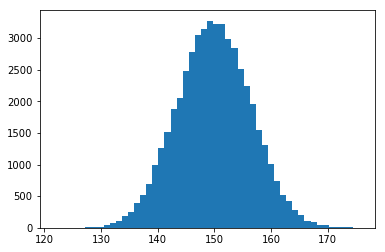

In [154]:
plt.hist(sampled, bins = 50)
plt.show()

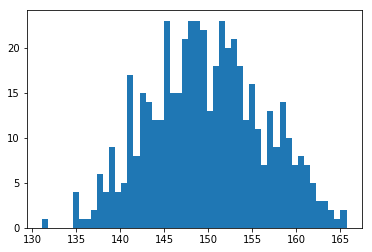

In [152]:
plt.hist(sampled, bins = 50)
plt.show()

Construire la variable réduire $z$

In [156]:
z = (sampled-sampled.mean())/sampled.std()

Construire la densité gaussienne de moyenne 0 et d'écart-type 1 entre -4 et 4, la représenter grpahiquement et superposer l'histogramme de $z$

In [157]:
import scipy.stats as stats
nx = np.linspace(-4, 4, 100)
normal = stats.norm.pdf(nx)

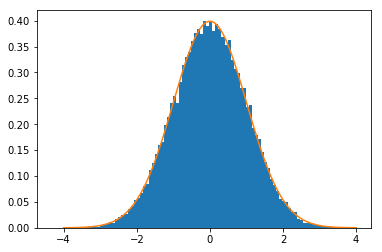

In [158]:
plt.hist(z, bins=100, normed=True)
plt.plot(nx, normal)
plt.show()